In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

# Machine Learning Excercise 1

## Binary Classification

We have a data set below, containing 6 data points, each containing a 2-dimensional vector associated with a label. For example, a vector `[1.2, 0.7]` is associated with the label `+1`.

| vector [x,y] 	| label 	|
|--------------	|-------	|
| [ 1.2, 0.7]  	| +1    	|
| [-0.3, -0.5] 	| -1    	|
| [3.0, 0.1]   	| +1    	|
| [-0.1, -1.0] 	| -1    	|
| [-1.0, 1.1]  	| -1    	|
| [2.1, -3.0]  	| +1    	|

To get a better understanding of the data, we can plot these two-dimensional vectors on a cartesian plane:

<img src="img/neural_networks_33.png" alt="drawing" width="500"/>

Here, the location on the point in the plane is given by the pair of coordinates, and its colour is defined by the label. Red points have the label `+1`, and the blue points have the label `-1`.  When we give the computer a pair of (x,y) coordinates, we want the computer to tell us should whether the point should be marked `-1`—red or `+1`—blue, according to what it knows from the data.  What does learning means in this case? The computer needs to define the boundary between these two given classes.

### Classification by using a simple linear function 

First we will use a simple linear function to implement binary classification:

\begin{align}
F = f(\mathbf{X},\mathbf{Y})=A\mathbf{X}+B\mathbf{Y}+C
\end{align}

Here, $\mathbf{X}$ and $\mathbf{Y}$ are the input vectors, and $A$, $B$ and $C$ are the parameters that we are trying to learn. This can be represented schematically:

<img src="img/neural_networks_16.png" alt="drawing" width="400"/>

So, if our data point is $(\mathbf{X},\mathbf{Y})=$ `[1.2,0.7]`, and if the chosen parameters are $A=$ `1`, $B=$ `-2`, $C=$ `-3`, initialise the variables:

For the corresponding data point label, initialise the variable `label`:

Compute the output of the function $F = f(\mathbf{X},\mathbf{Y})$ and assign it to the variable `output`:

<img src="img/neural_networks_17.png" alt="drawing" width="400"/>

The prediction has to do with how do we interpret the output $F$ of the function $f(\mathbf{X},\mathbf{Y})$.<br>

__We can define that in our algorithm, the parameters $A$, $B$, and $C$ must be tuned such that the function $f$ outputs a number greater than 0 when it encounters a data point associated with the label `+1`. In the same way, the function should output a number less (or equal to) than 0 when it encounters a data point associated with the label `-1`.__


| Neuron Output 	| Label | Action         |
|--------------	|---------- | ------         |
| Output > +1  	| +1    	| do nothing     |
| Output > -1 	| -1    	| minimise output|
| Output < +1   	| +1    	| maximise output|
| Output < -1 	| -1    	| do nothing     |

Decide whether we should minimise or maximise the output of the function $F = f(\mathbf{X},\mathbf{Y})$ for the current data point?

Create a python function `decide(output, label)`, that prints whether we should minimise or maximise our function $F = f(\mathbf{X},\mathbf{Y})$:

Test the function `decide` for the current output and label, and try some other values:

If the formulas for maximising and minimising functions are respectively:
$$x_{new} = x_{old} + \frac{dy}{dx}x_{old} \cdot c$$
and
$$x_{new} = x_{old} - \frac{dy}{dx}x_{old} \cdot c$$

How can we use a number-holding variable, for example `sign` to modify this function so that it can maximise and minimise according to its value:

Initialise the variable `sign` to zero, and write code that will set its value to `-1` or `1` according to the current values of the variables `output` and `label`

What is the value of `sign` for the output of our current data points and their label?

### Computing the gradient

<img src="img/neural_networks_16.png" alt="drawing" width="400"/>

We have computed the partial derivatives in terms of parameters $A$, $B$, and $C$:

\begin{align*}
\frac{\partial F}{\partial A} &=\frac{\partial F}{\partial G}*\frac{\partial G}{\partial A}; &\frac{\partial F}{\partial B} &=\frac{\partial F}{\partial G}*\frac{\partial G}{\partial B}; &\frac{\partial F}{\partial C} ;& \\\\
\frac{\partial F}{\partial A} &=1*X &\frac{\partial F}{\partial B} &=1*Y &\frac{\partial F}{\partial C} &=1 \\\\
\frac{\partial F}{\partial A} &=X &\frac{\partial F}{\partial B} &=Y &\frac{\partial F}{\partial C} &=1
\end{align*}

Initialise the partial derivatives using the variables `dA`, `dB` and `dC`, and print their values:

Introduce the variable `step_size` to hold a very small number and minimise/maximise the value of `dA`, `dB` and `dC`:

Evaluate the  function $f(\mathbf{X},\mathbf{Y})$, with the updated parameters $A$, $B$, and $C$:

This result should be better then the original result `-3.2` !

***

#### Exercise 1:
Write a simple algorithm for binary classification by using the previously written code:

***

### Simple linear classification algorithm

Here, the previous steps are put together in an working algorithm. 

| vector [x,y] 	| label 	|
|--------------	|-------	|
| [ 0.0, 0.7]  	| +1    	|
| [-0.3, -0.5] 	| -1    	|
| [3.0, 0.1]   	| +1    	|
| [-0.1, -1.0] 	| -1    	|
| [-1.0, 1.1]  	| -1    	|
| [2.1, -3.0]  	| +1    	|

We can represent the data as a 2-dimensional numpy array

In [2]:
data = np.array([[ 0.0, 0.7],
                 [-0.3,-0.5],
                 [ 3.0, 0.1],
                 [-0.1,-1.0],
                 [-1.0, 1.1],
                 [ 2.1,-3.0]])

We can represent the labels as a simple numpy array of numbers

In [3]:
labels = np.array([ 1,
                   -1,
                    1,
                   -1,
                   -1,
                   +1])

We can plot the data using the following function:

In [4]:
def plot_data(data, labels):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.scatter(data[:,0], data[:,1], c=labels, s=50,  cmap=plt.cm.bwr,zorder=50)
    nudge = 0.08
    for i in range(data.shape[0]):
        d = data[i]
        ax.annotate(f'{i}',(d[0]+nudge,d[1]+nudge))
    ax.set_aspect('equal', 'datalim')
    plt.show()

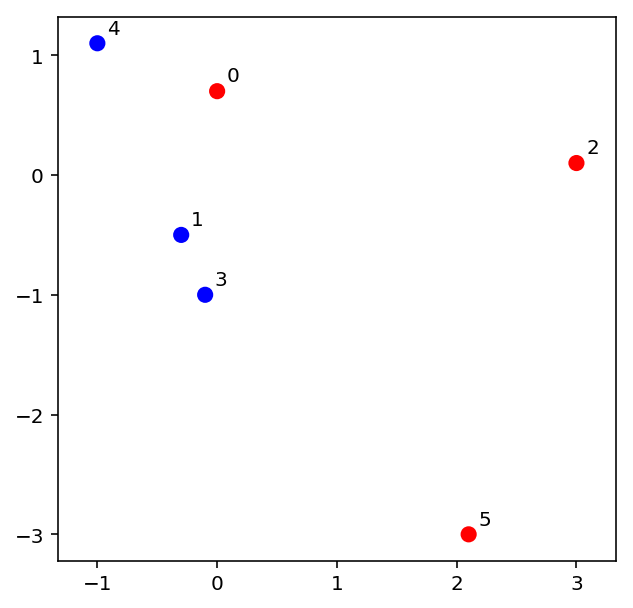

In [5]:
plot_data(data,labels)

This is a function to evaluate the accuracy of the training

In [6]:
def eval_accuracy(data,labels, A,B,C):
    num_correct = 0;
    data_len = data.shape[0]
    
    for i in range(data_len):
        X,Y = data[i]
        current_label = labels[i]  
        output = A*X + B*Y + C
        predicted_label = 1 if output >= 1 else -1 if output <= -1 else 0
        if (predicted_label == current_label):
            num_correct += 1
    return np.round(num_correct / data_len,3)

def create_meshgrid(data):
    h = 0.02
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return (xx,yy,np.ones(xx.shape))

def plot_learning_simple(grid,data,labels,A,B,C,iteration, accuracy):
    xx,yy,Z = grid
    
    for i in range(xx.shape[0]): # row
        for j in range(yy.shape[1]): #column
            X, Y = xx[i][j],yy[i][j]
            output = A*X + B*Y + C
            output = 1 if output > 0 else -1
            Z[i][j] = output

    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    plt.title(f'accuracy at the iteration {iteration}: {accuracy}')
    ax.contourf(xx, yy, Z, cmap=plt.cm.binary, alpha=0.1, zorder=15)
    ax.scatter(data[:, 0], data[:, 1], c=labels, s=50,  cmap=plt.cm.bwr,zorder=50)
    ax.set_aspect('equal')
    nudge = 0.08
    for i in range(data.shape[0]):
        d = data[i]
        ax.annotate(f'{i}',(d[0]+nudge,d[1]+nudge))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

Here is the main algorithm.

In [7]:
def train_neural_network(data, labels, step_size, no_loops, iter_info):
    #A, B, and C are parameters of the function F. Here, they are set to 1, -2, -1
    A, B, C = 1, -2, -1
    # this function is used for plotting, it can be ignored
    grid = create_meshgrid(data)
    
    # the main training loop
    for i in range(no_loops):
        # we randomly select the data point, and store its info into: x,y,label
        index = np.random.randint(data.shape[0])
        X,Y = data[index]
        label = labels[index]
        # we calculate the output of the function
        output = A*X + B*Y + C
        # We need to define how to affect parameters.
        # If the label is 1 but the output is smaller than 1, we want to push the score up.
        # If the label is -1 but the output is larger than -1, we want to push the score down.
        sign = 0.0
        if (label == 1 and output <= 1):
            sign = 1.0
        if (label ==-1 and output > -1):
            sign = -1.0
         # partial derivative of dF/dA is X, dF/dB is Y, and of dF/dC is 1. 
        dA, dB, dC = X, Y, 1
        # here we update the parameter values using partial derivatives
        A = A + dA * sign * step_size
        B = B + dB * sign * step_size
        C = C + dC * sign * step_size;
        
        # after a number of iterations, show training accuracy and plot it
        if (i%iter_info==0):
            accuracy = eval_accuracy(data, labels, A,B,C)
            plot_learning_simple(grid,data,labels,A,B,C,i,accuracy)
    # the algorithm returns the learned parameters A, B, and C
    return (A,B,C)

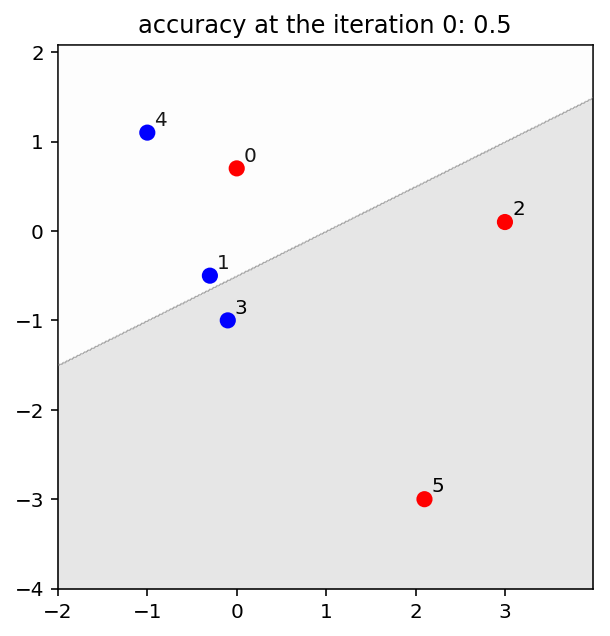

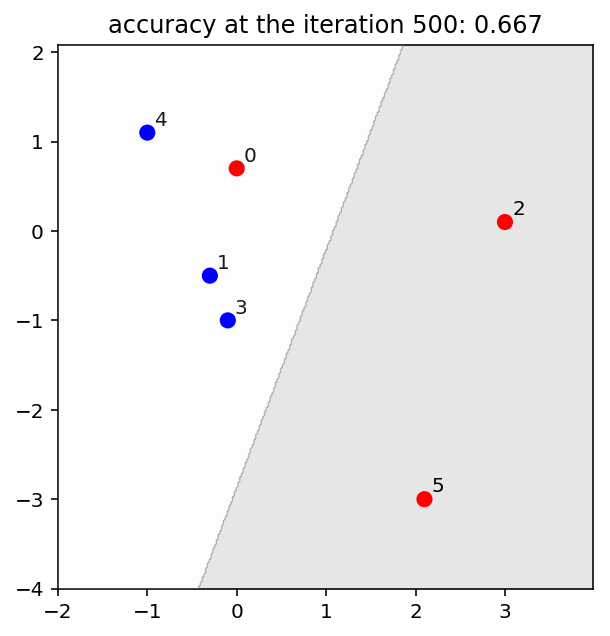

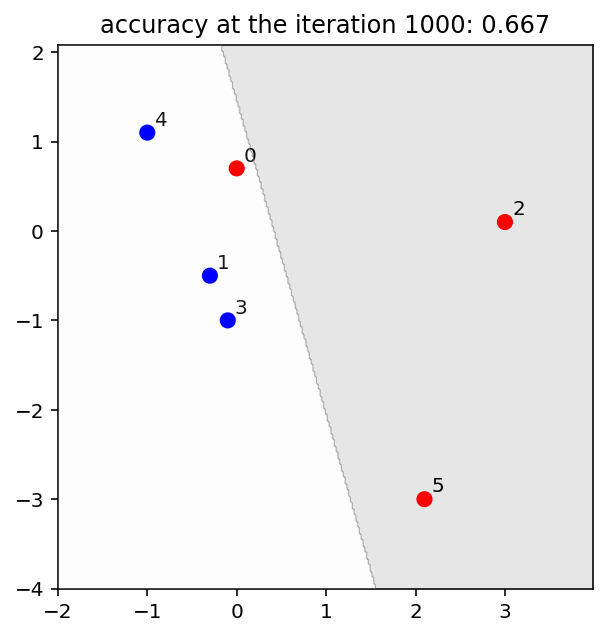

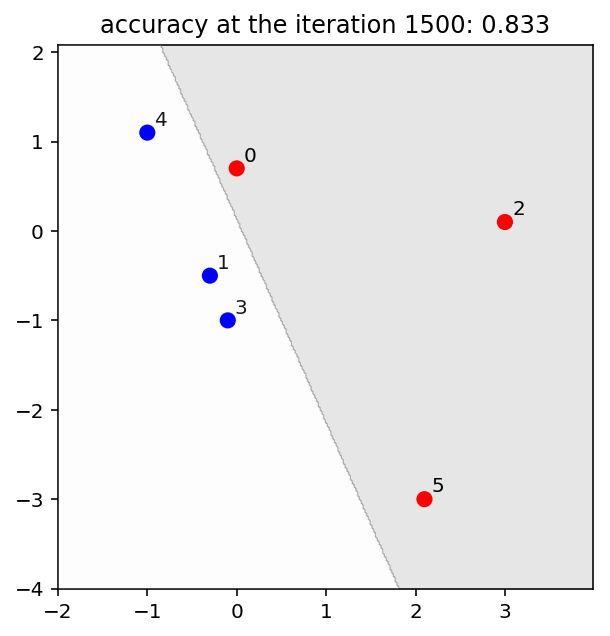

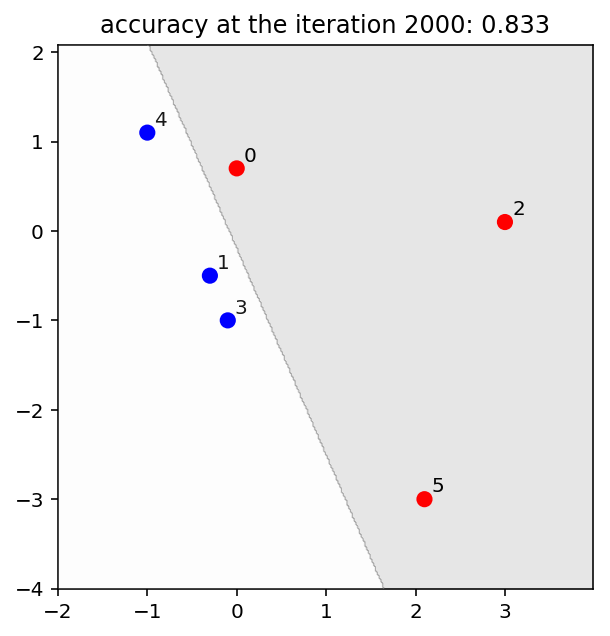

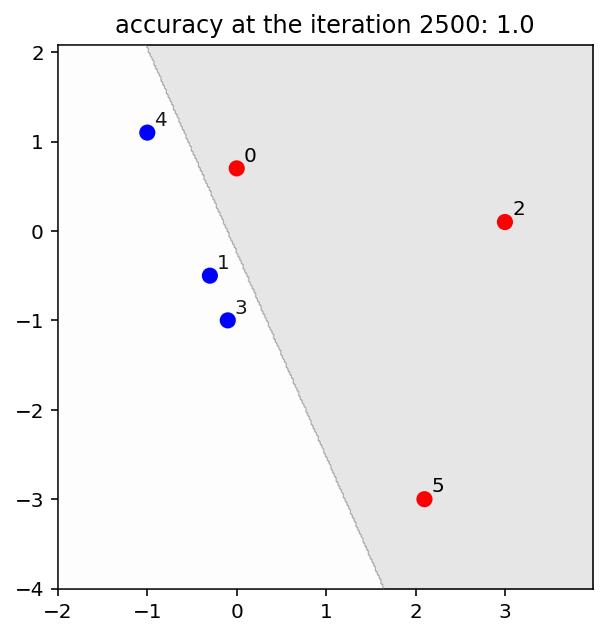

In [8]:
train_1 = train_neural_network(data, labels, 0.01, 2501, 500)

We can inspect the result by comparing the real label of a data point and the predicted label:

In [9]:
def show_prediction(train, data, labels):
    A, B, C = train
    for i in range(data.shape[0]):
        X,Y = data[i]
        label = labels[i]
        output = A*X + B*Y + C
        predicted_label = 1 if output >= 1 else -1 if output <= -1 else 0
        print (f'data point {i}: real label : {label}, pred. label: {predicted_label}, {(label==predicted_label)}')

In [10]:
show_prediction(train_1,data,labels)

data point 0: real label : 1, pred. label: 1, True
data point 1: real label : -1, pred. label: -1, True
data point 2: real label : 1, pred. label: 1, True
data point 3: real label : -1, pred. label: -1, True
data point 4: real label : -1, pred. label: -1, True
data point 5: real label : 1, pred. label: 1, True
